In [1]:
import geopandas as gpd

# Download from US Census TIGER data (shapefile)
url = "https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_county_20m.zip"

# Read directly from ZIP if using local copy
counties = gpd.read_file("cb_2022_us_county_20m.zip")
iowa = counties[counties['STATEFP'] == '19']  # 19 = Iowa
iowa.to_file("iowa_counties.geojson", driver="GeoJSON")


In [3]:
from rasterstats import zonal_stats
import geopandas as gpd
import pandas as pd

# Load zones
zones = gpd.read_file("iowa_counties.geojson")

# Placeholder until NDVI is downloaded
ndvi_path = "NDVI_IOWA_JunToOct.tif"

# Compute zonal stats
stats = zonal_stats(zones, ndvi_path, stats=["mean", "min", "max", "std"])

# Merge into DataFrame
df = pd.DataFrame(stats)
df["county"] = zones["NAME"]
df.to_csv("ndvi_by_county.csv", index=False)


In [7]:
import rasterio
import numpy as np

with rasterio.open("NDVI_IOWA_JunToOct.tif") as src:
    ndvi = src.read(1)
    print("NDVI min:", np.nanmin(ndvi))
    print("NDVI max:", np.nanmax(ndvi))
    print("NDVI mean:", np.nanmean(ndvi))



NDVI min: -0.15406
NDVI max: 0.6308547
NDVI mean: 0.41201404


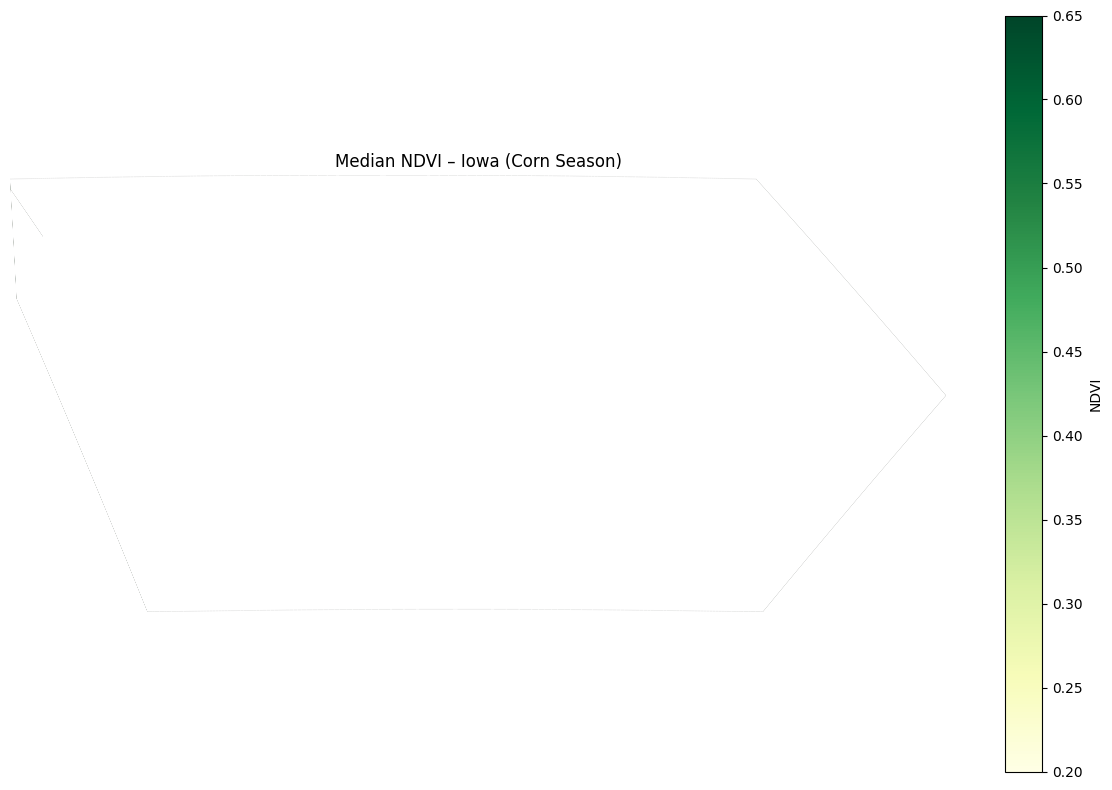

In [12]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Open raster and get bounds
with rasterio.open("NDVI_IOWA_JunToOct.tif") as src:
    ndvi = src.read(1)
    bounds = src.bounds

# Clean up NDVI for display
ndvi = np.clip(ndvi, 0.2, 0.65)

# Get extent: (left, right, bottom, top)
extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

# Plot with geographic extent
plt.figure(figsize=(12, 8))
plt.imshow(ndvi, cmap='YlGn', vmin=0.2, vmax=0.65, extent=extent)
plt.colorbar(label='NDVI')
plt.title("Median NDVI – Iowa (Corn Season)")
plt.axis('off')
plt.tight_layout()
plt.show()




In [13]:
import rasterio

with rasterio.open("NDVI_IOWA_JunToOct.tif") as src:
    print("Width x Height:", src.width, "x", src.height)
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)
    print("Resolution:", src.res)


Width x Height: 23319 x 10876
CRS: EPSG:4326
Bounds: BoundingBox(left=-96.55532848205837, bottom=40.59558634158847, right=-90.27098424894344, top=43.52660945061365)
Resolution: (0.00026949458523585647, 0.00026949458523585647)
